In [13]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import pickle
import json

In [14]:
### LOAD THE EXPERIMENT
experiment = "1by2_5cycles_isocz"


#----
path_exp = f"data/{experiment}/"
pack = None
with open(path_exp+"model.pkl", 'rb') as f:
    pack = pickle.load(f)

profile = None
with open(path_exp+"profile.json", 'r') as f:
    profile = json.load(f)

print(json.dumps(profile, indent=4))

data = pd.read_csv(path_exp+"data.csv", index_col=[0,1,2])
CYCLE = data.index.get_level_values(0)
PROTOCOL = data.index.get_level_values(1)

{
    "Experiment": "1by2_5cycles_isocz",
    "Parallel": 2,
    "Series": 1,
    "Cutoffs": [
        2.5,
        4.1
    ],
    "I-app": 26.6,
    "I-app factor cut": 0.1,
    "Cycles": 5,
    "Min_current": 2.66,
    "Parameter Variations": {
        "Cathode Diffusion": "(1e-14, Uniform: 0.000%)",
        "Cathode Max Concentration": "(51555, Uniform: 0.000%)",
        "Cathode Initial SOC": "(25777.5, Uniform: 5.000%)",
        "Cathode Thickness": "(8e-05, Uniform: 0.000%)",
        "Cathode Porosity": "(0.385, Uniform: 0.000%)",
        "Anode Diffusion": "(2e-14, Uniform: 0.000%)",
        "Anode Max Concentration": "(30555, Uniform: 0.000%)",
        "Anode Initial SOC": "(22610.7, Uniform: 5.000%)",
        "Anode Thickness": "(8.8e-05, Uniform: 0.000%)",
        "Anode Porosity": "(0.485, Uniform: 0.000%)",
        "Particle Radius": "(2e-06, Uniform: 0.000%)"
    }
}


In [21]:
#toplot = [1] + list(range(10, 110, 10))
toplot = range(1, pack.cycles+1)

group = data.loc[
    (CYCLE.isin(toplot)) & 
    (PROTOCOL.str.contains("-discharge"))
]
# c = pack.cells[0,0]
# print(c.pos.eps_n.value)
group


Global Time         Time  Pack Voltage  Pack Current  \
1 CC-discharge 0       0.000000     0.000000      3.969284         -26.6   
               1      72.727273    72.727273      3.953019         -26.6   
               2     145.454545   145.454545      3.942085         -26.6   
               3     218.181818   218.181818      3.931953         -26.6   
               4     290.909091   290.909091      3.922428         -26.6   
...                         ...          ...           ...           ...   
5 CC-discharge 86  75539.453453  6254.545455      3.198746         -26.6   
               87  75612.180726  6327.272727      3.150045         -26.6   
               88  75684.907999  6400.000000      3.069931         -26.6   
               89  75757.635272  6472.727273      2.861318         -26.6   
               90  75797.404991  6512.496992      2.500010         -26.6   

                   String 1 Iapp  String 2 Iapp  \
1 CC-discharge 0      -15.660608     -10.939392   
               1      -15.132432     -11.467568   
               2      -14.844617     -11.755383   
               3      -14.616763     -11.983237   
               4      -14.432963     -12.167037   
...                          ...            ...   
5 CC-discharge 86     -12.436009     -14.163991   
               87     -12.212928     -14.387072   
               88     -11.721834     -14.878166   
               89     -11.717426     -14.882574   
               90     -12.460227     -14.139773   

                   Cell 1,1 Cathode Concentration  \
1 CC-discharge 0                     24878.269077   
               1                     25177.491159   
               2                     25406.849520   
               3                     25631.470324   
               4                     25853.087226   
...                                           ...   
5 CC-discharge 86                    44665.732537   
               87                    44854.070859   
               88                    45035.785446   
               89                    45212.526928   
               90                    45316.066564   

                   Cell 1,1 Anode Concentration  Cell 1,1 Anode SEI Length  \
1 CC-discharge 0                   22476.684622               5.000000e-09   
               1                   22186.251239               5.000000e-09   
               2                   21937.724855               5.000000e-09   
               3                   21693.320887               5.000000e-09   
               4                   21452.271821               5.000000e-09   
...                                         ...                        ...   
5 CC-discharge 86                    998.068609               5.190101e-09   
               87                    793.226125               5.190101e-09   
               88                    594.982319               5.190101e-09   
               89                    402.475315               5.190101e-09   
               90                    291.182542               5.190101e-09   

                   Cell 1,1 Voltage  Cell 1,1 Capacity by Area  \
1 CC-discharge 0           3.969284                   0.000000   
               1           3.953019                   0.311041   
               2           3.942085                   0.613839   
               3           3.931953                   0.911429   
               4           3.922428                   1.204861   
...                             ...                        ...   
5 CC-discharge 86          3.198746                  22.608069   
               87          3.150045                  22.857048   
               88          3.069931                  23.098814   
               89          2.861318                  23.335574   
               90          2.500010                  23.469121   

                   Cell 1,2 Cathode Concentration  \
1 CC-discharge 0                     25542.281807   
               1     

<AxesSubplot: xlabel='Global Time'>

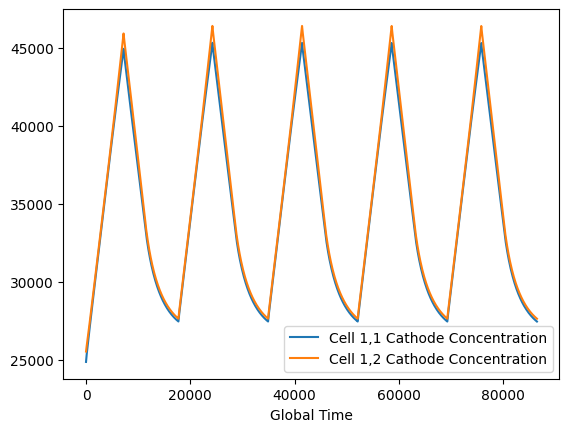

In [25]:
a = data.filter(regex='Time|Cathode Concentration')
a.plot(x='Global Time', y=data.filter(regex='Cathode Concentration').columns, kind='line')

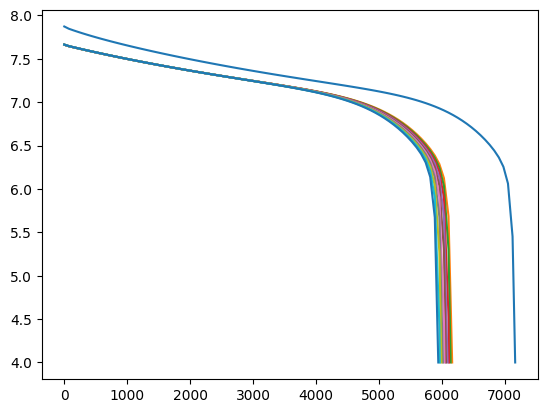

In [19]:
for cycle in toplot:
    plt.plot(group.loc[(cycle), 'Time'], group.loc[(cycle), 'Pack Voltage'])

C:\Users\adity\AppData\Local\Temp\ipykernel_28708\1788799197.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(group2.loc[(1), 'Global Time'], group2.loc[(1), pack.cells[0,0].voltage.name], 'ro', markersize=4)
C:\Users\adity\AppData\Local\Temp\ipykernel_28708\1788799197.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(single.loc[('C1'), 'Global Time'], single.loc[('C1'), "Cell1 Voltage"], color='blue')
C:\Users\adity\AppData\Local\Temp\ipykernel_28708\1788799197.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  plt.plot(single.loc[('C2'), 'Global Time'], single.loc[('C2'), "Cell1 Voltage"], color='blue')


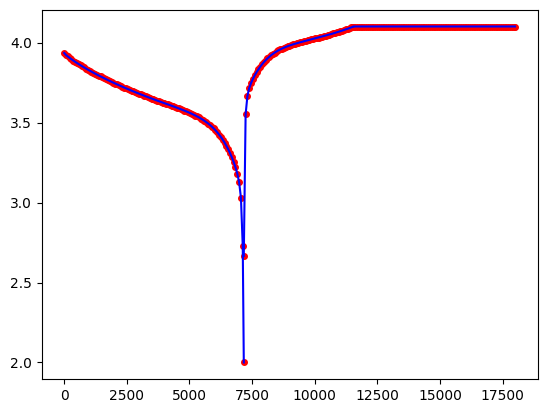

In [55]:
group2 = data.loc[
    (CYCLE.isin(toplot))
]

plt.plot(group2.loc[(1), 'Global Time'], group2.loc[(1), pack.cells[0,0].voltage.name], 'ro', markersize=4)

single = pd.read_csv("data/CCCV-3.csv", index_col=[0,1])
plt.plot(single.loc[('C1'), 'Global Time'], single.loc[('C1'), "Cell1 Voltage"], color='blue')
plt.plot(single.loc[('C2'), 'Global Time'], single.loc[('C2'), "Cell1 Voltage"], color='blue')

plt.savefig("here.png")